In [56]:


import numpy as np 
import pandas as pd 
import re


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv


# Important libraries

In [57]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

from prettytable import PrettyTable

In [58]:
#Loading the data
df = pd.read_csv('/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv')

# Explainatory Data Analysis

In [59]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [60]:
df.shape

(13320, 9)

In [61]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [62]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


checking if there are some nan values

In [64]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [65]:
df.groupby("area_type")["area_type"].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# Data Visualization

(array([8790.,    0.,    0., 2025.,    0.,    0., 2418.,    0.,    0.,
          87.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

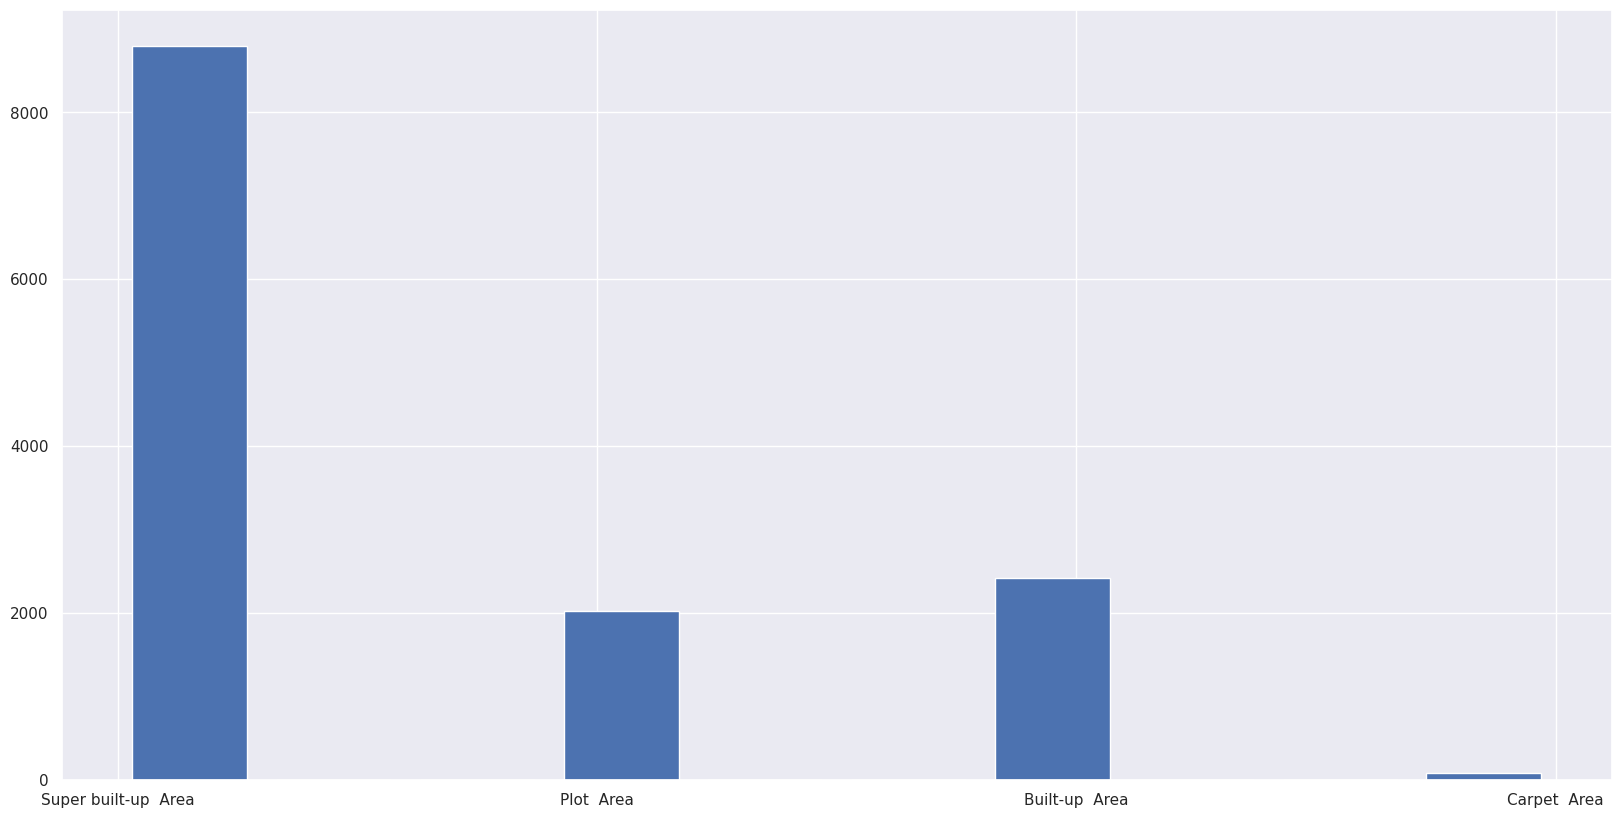

In [66]:

plt.hist(df['area_type'], rwidth = 0.8)

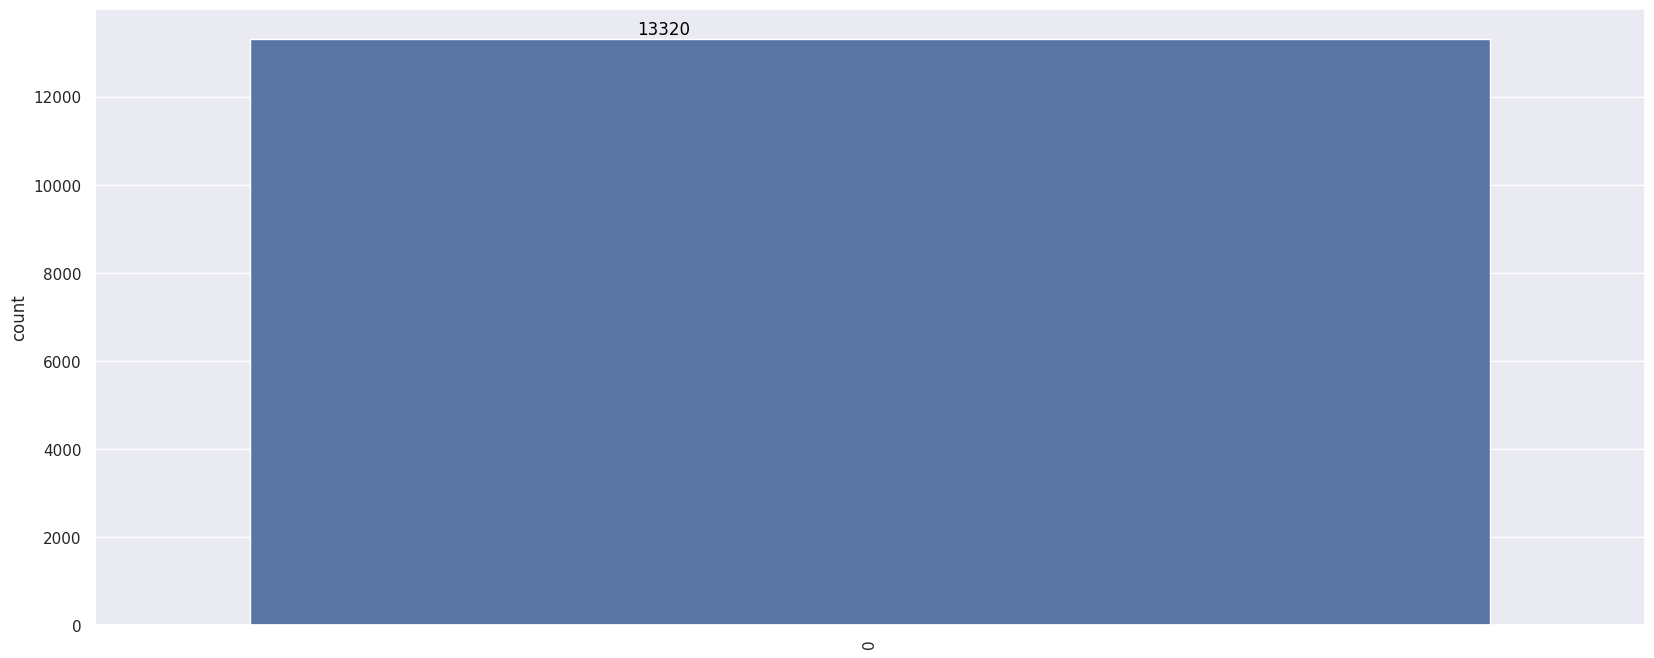

In [67]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (20,8))
ax=sns.countplot(df['balcony'], )
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

<Axes: xlabel='bath'>

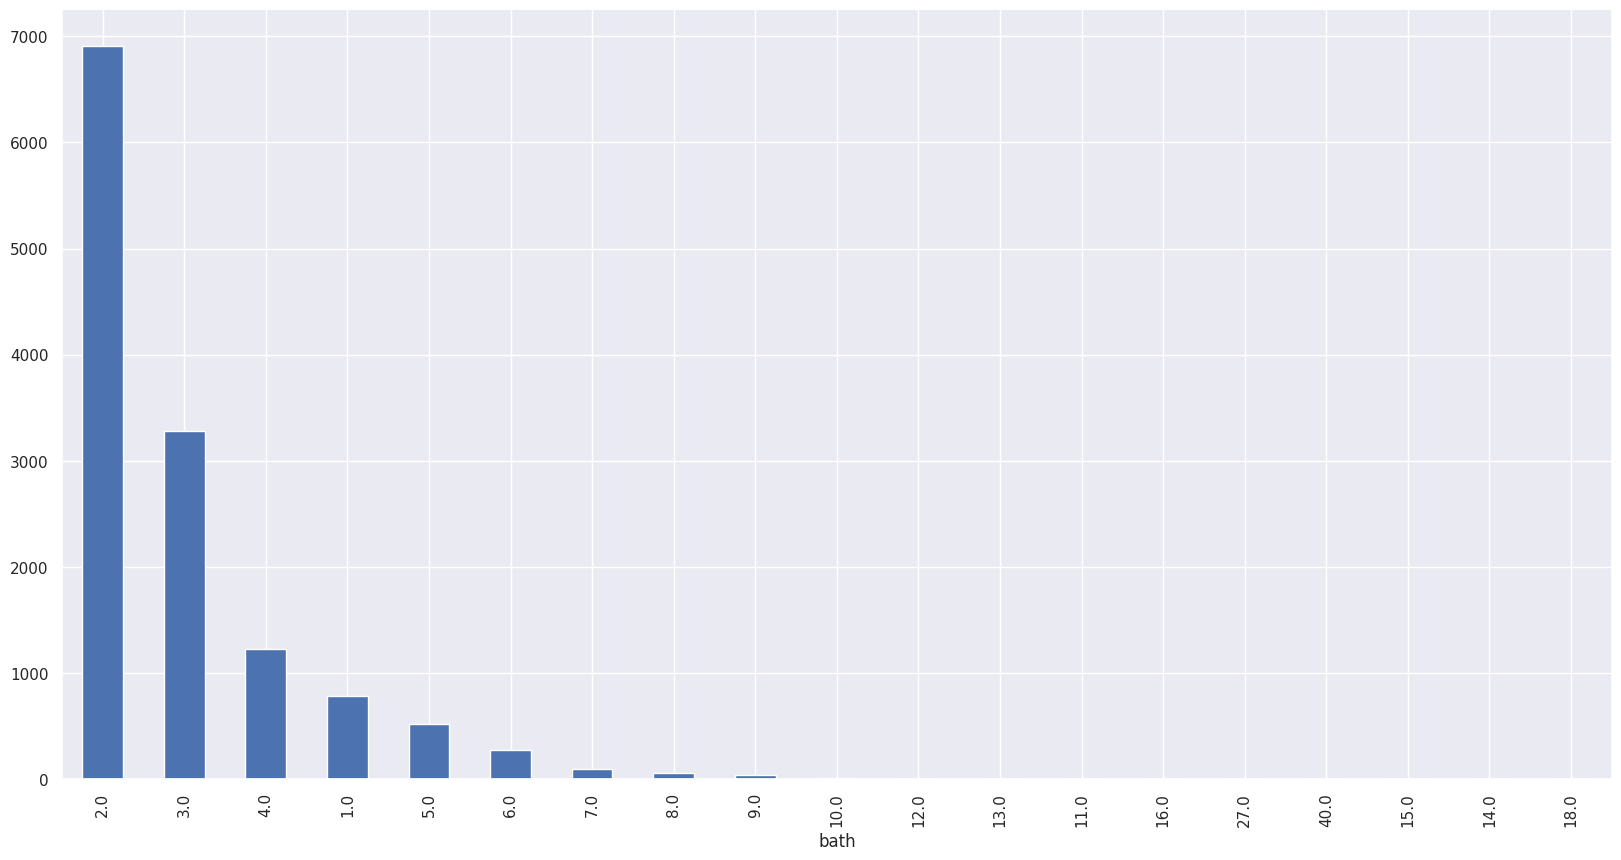

In [68]:
df.bath.value_counts().plot(kind='bar')
# df.hist(column=['bath'])

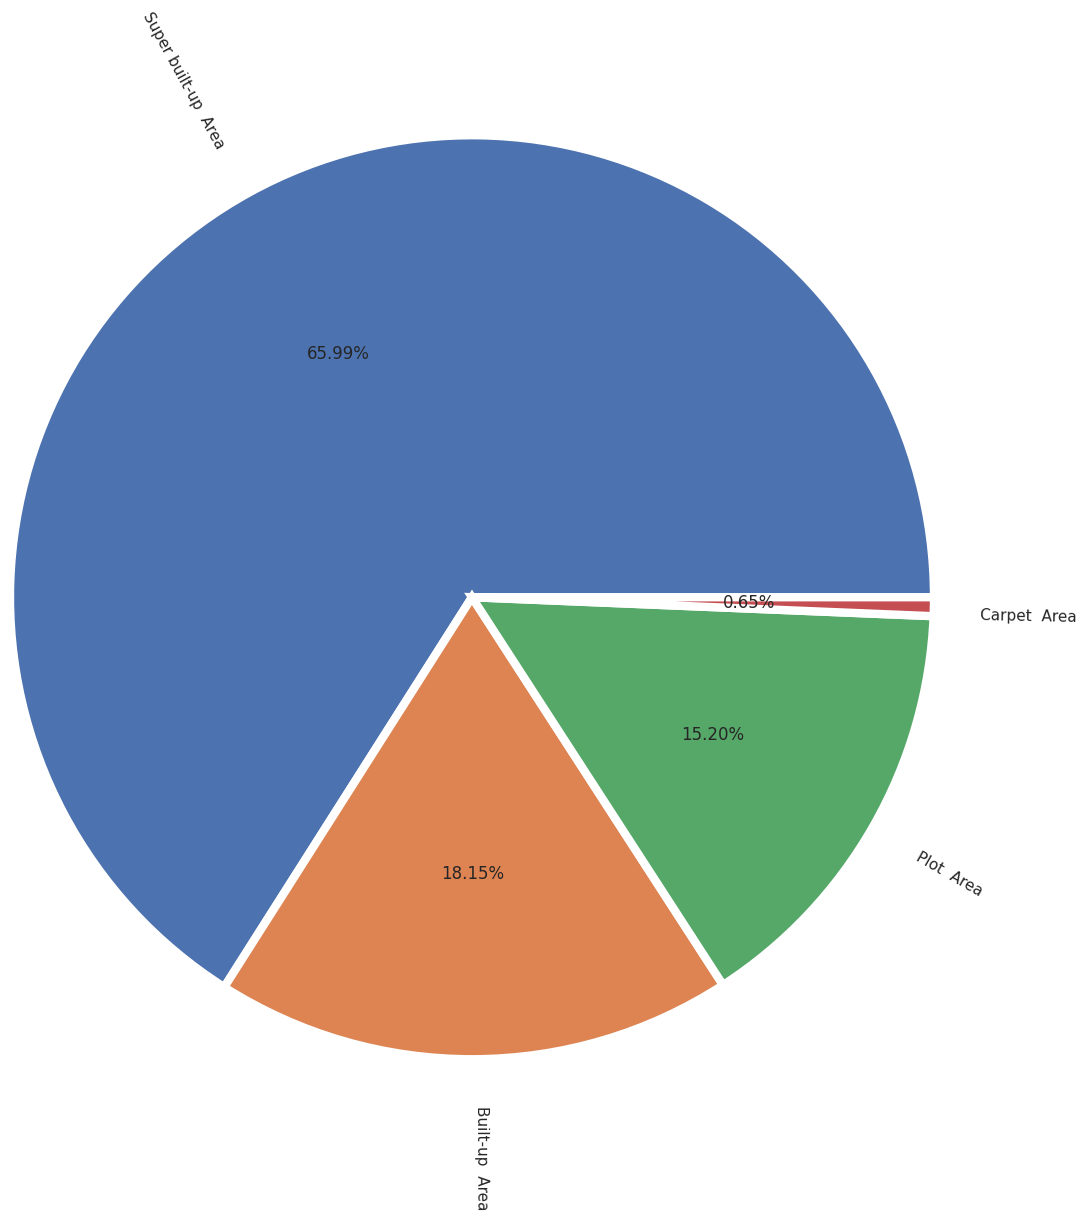

In [69]:
(df["area_type"].value_counts()).plot.pie(autopct="%.2f%%", shadow=False, wedgeprops={'linewidth': 6}, rotatelabels=True,radius=1.5)
plt.show()

In [70]:
df1 = df.drop(['area_type','availability','society','balcony'],axis= 1)
df1.shape

(13320, 5)

In [71]:

df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [72]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

# Feature Engineering and dimensionality reduction

In [73]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [74]:
# creating new feature BHK (numerical) 
df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.BHK.unique()

/tmp/ipykernel_36/2727575234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

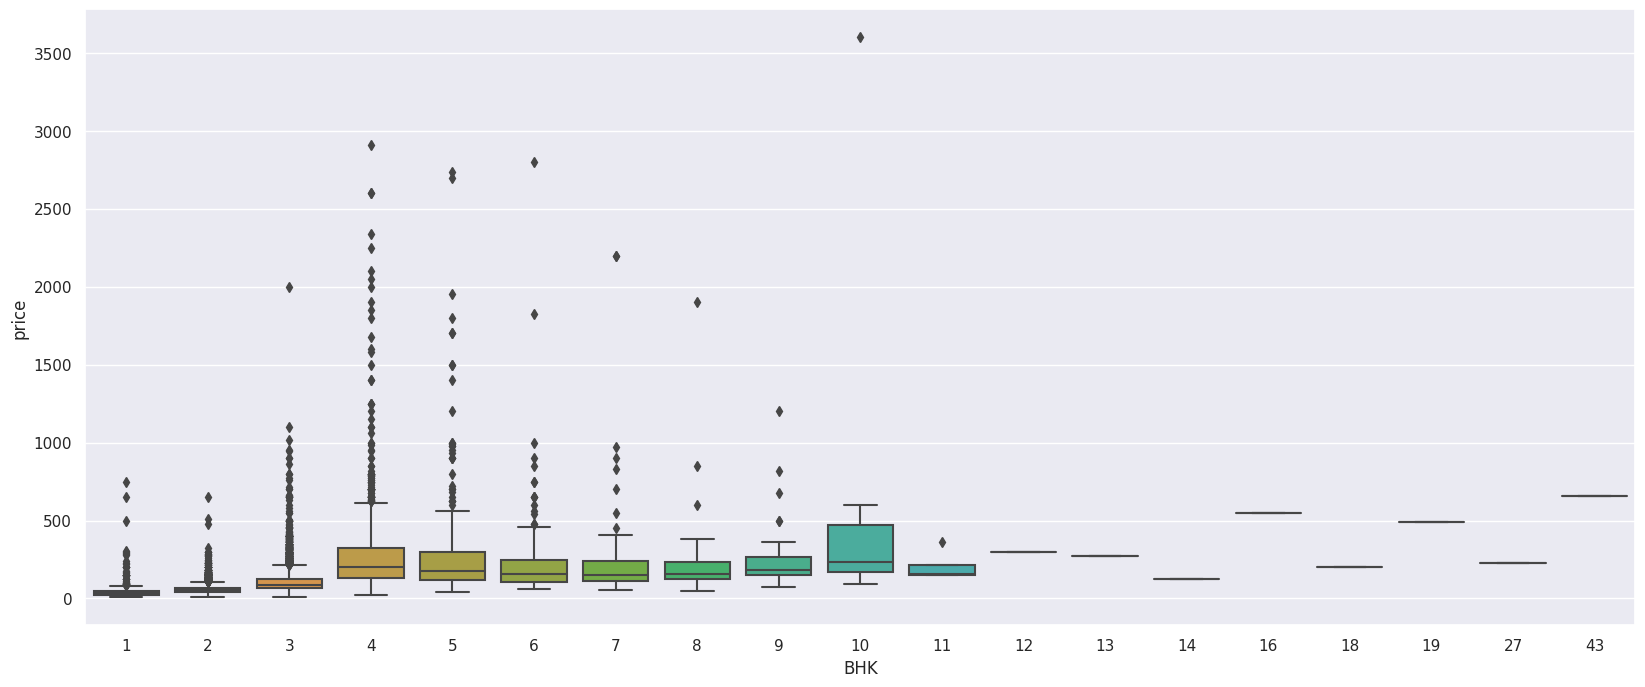

In [75]:
plt.figure(figsize = (20,8))
sns.boxplot(x = 'BHK', y = 'price', data = df2)
plt.show()

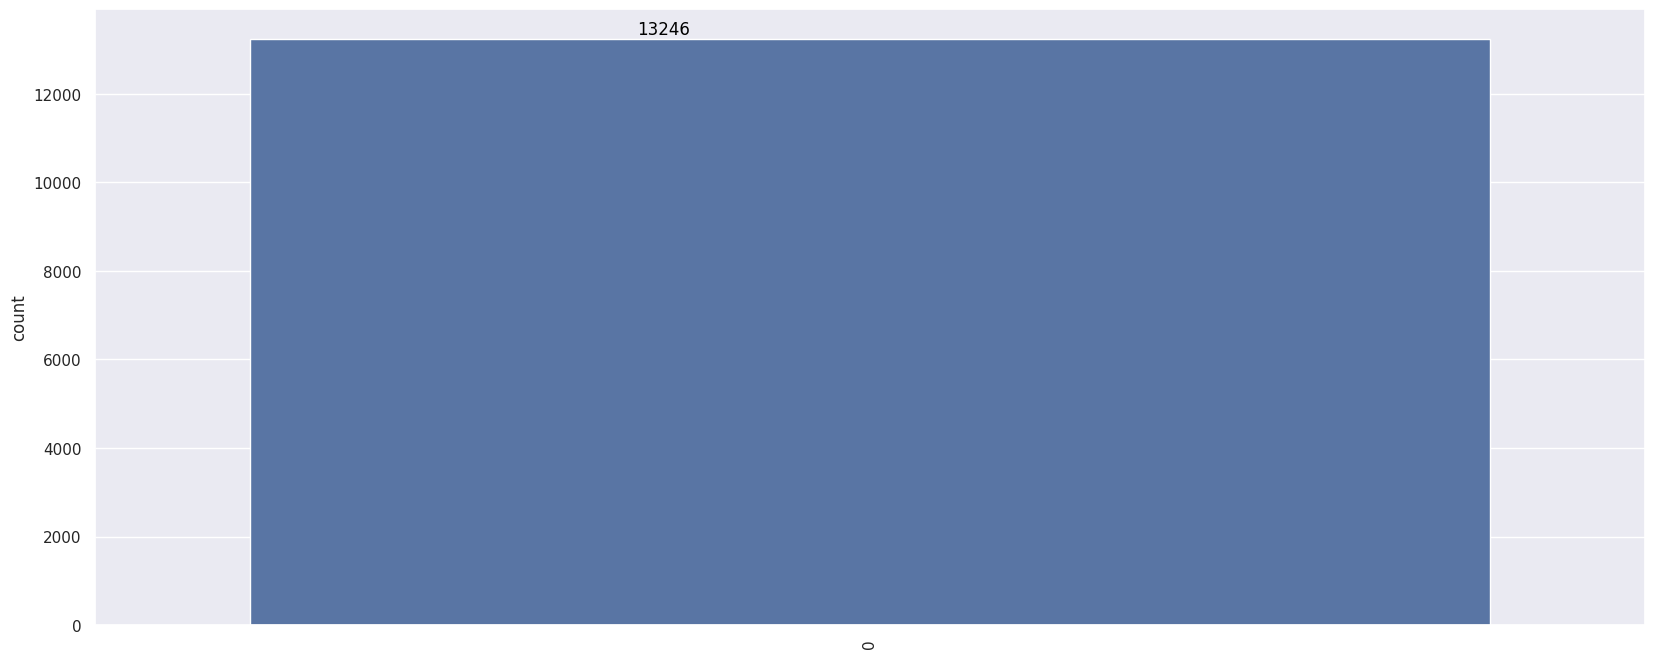

In [76]:
plt.figure(figsize = (20,8))
ax=sns.countplot(df2['BHK'])
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

In [77]:

df2['total_sqft'].unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [78]:
 
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True



In [79]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [80]:
def convert_totalsqft_to_num(x):
    splits = x.split('-')
    if len(splits) == 2:
        return (float(splits[0])+float(splits[1]))/2
    try:
        return float(x)
    except:
        return None




In [81]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_totalsqft_to_num)
df2 = df2[df2['total_sqft'].notnull()]
df2.isnull().sum()

/tmp/ipykernel_36/698877410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft'] = df2['total_sqft'].apply(convert_totalsqft_to_num)


location      0
size          0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

# outlier detection 

In [82]:

df3 = df2.copy()
df3["price_per_sqft"] = df3["price"]*100000/df3["total_sqft"]
df3.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [83]:
df3.location = df3.location.apply(lambda x: x.strip())
location_stats = df3['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [84]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [85]:
df3.location = df3.location.apply(lambda x: 'Other' if x in location_stats_less_than_10 else x)
len(df3.location.unique())

241

In [86]:
df4 = df3.copy()
outliers = df3[df3.total_sqft/df3.BHK<300]
outliers

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,Other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,Other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [87]:
df4.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
BHK               0
price_per_sqft    0
dtype: int64

In [88]:
df5 = df4[~(df4.total_sqft/df4.BHK<300)]
df5.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
BHK               0
price_per_sqft    0
dtype: int64

In [89]:
df5['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [90]:
def outlier_removal(df):
    df_out = pd.DataFrame()
    for index, location_df in df.groupby('location'):
        m = np.mean(location_df['price_per_sqft'])
        s = np.std(location_df['price_per_sqft'])
        without_outlier = location_df[(location_df['price_per_sqft']>(m-s)) & (location_df['price_per_sqft']<(m+s))]
        df_out = pd.concat([df_out,without_outlier], ignore_index=True)
    return df_out

In [91]:
df6 = outlier_removal(df5)
df6.shape

(10242, 7)

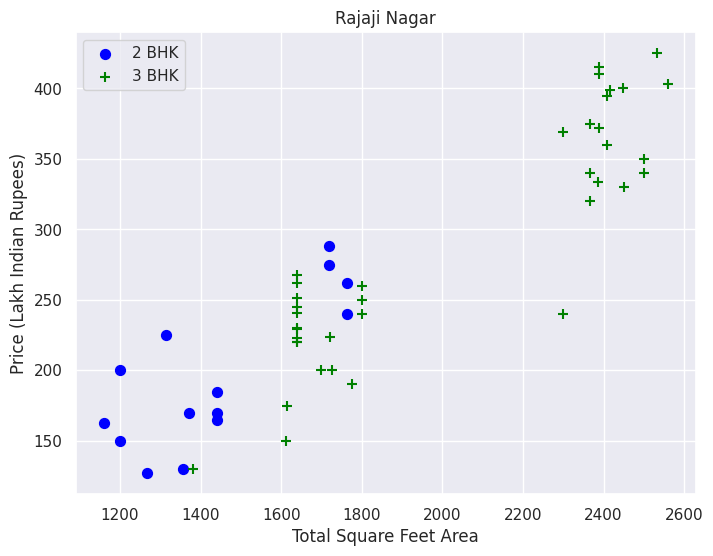

In [92]:
def plot_scatter(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (8,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter(df6,"Rajaji Nagar")

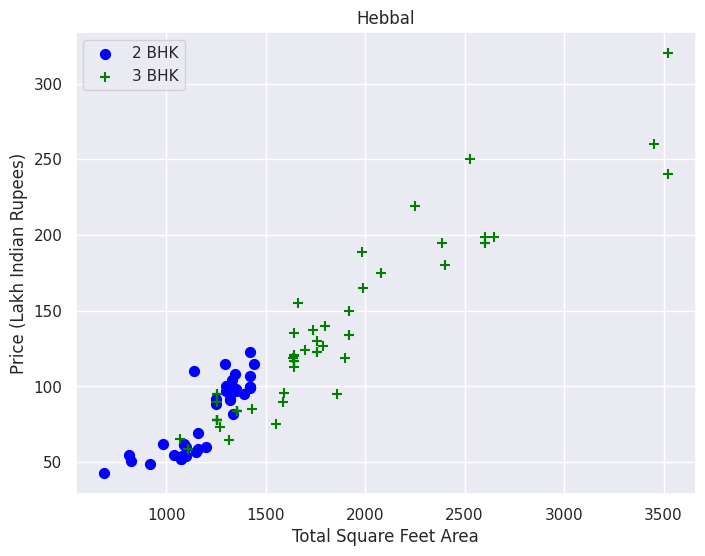

In [93]:
plot_scatter(df6,"Hebbal")

In [94]:


def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)

df7.shape

(7317, 7)

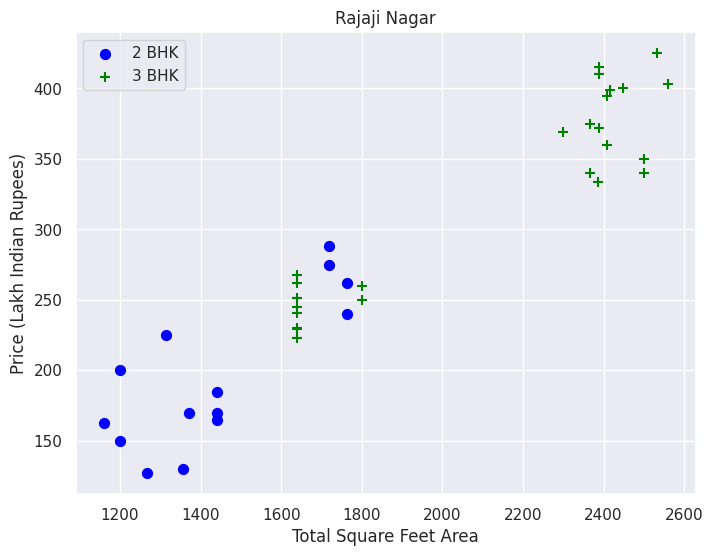

In [95]:
plot_scatter(df7,"Rajaji Nagar")

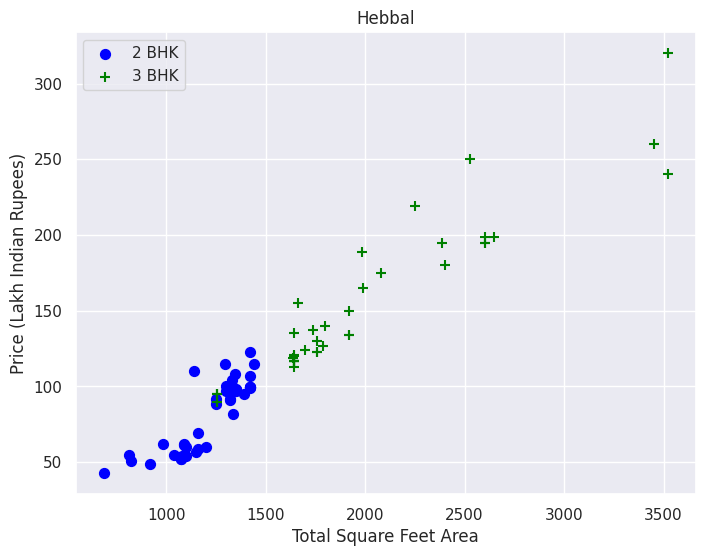

In [96]:
plot_scatter(df7,"Hebbal")

Text(0, 0.5, 'Count')

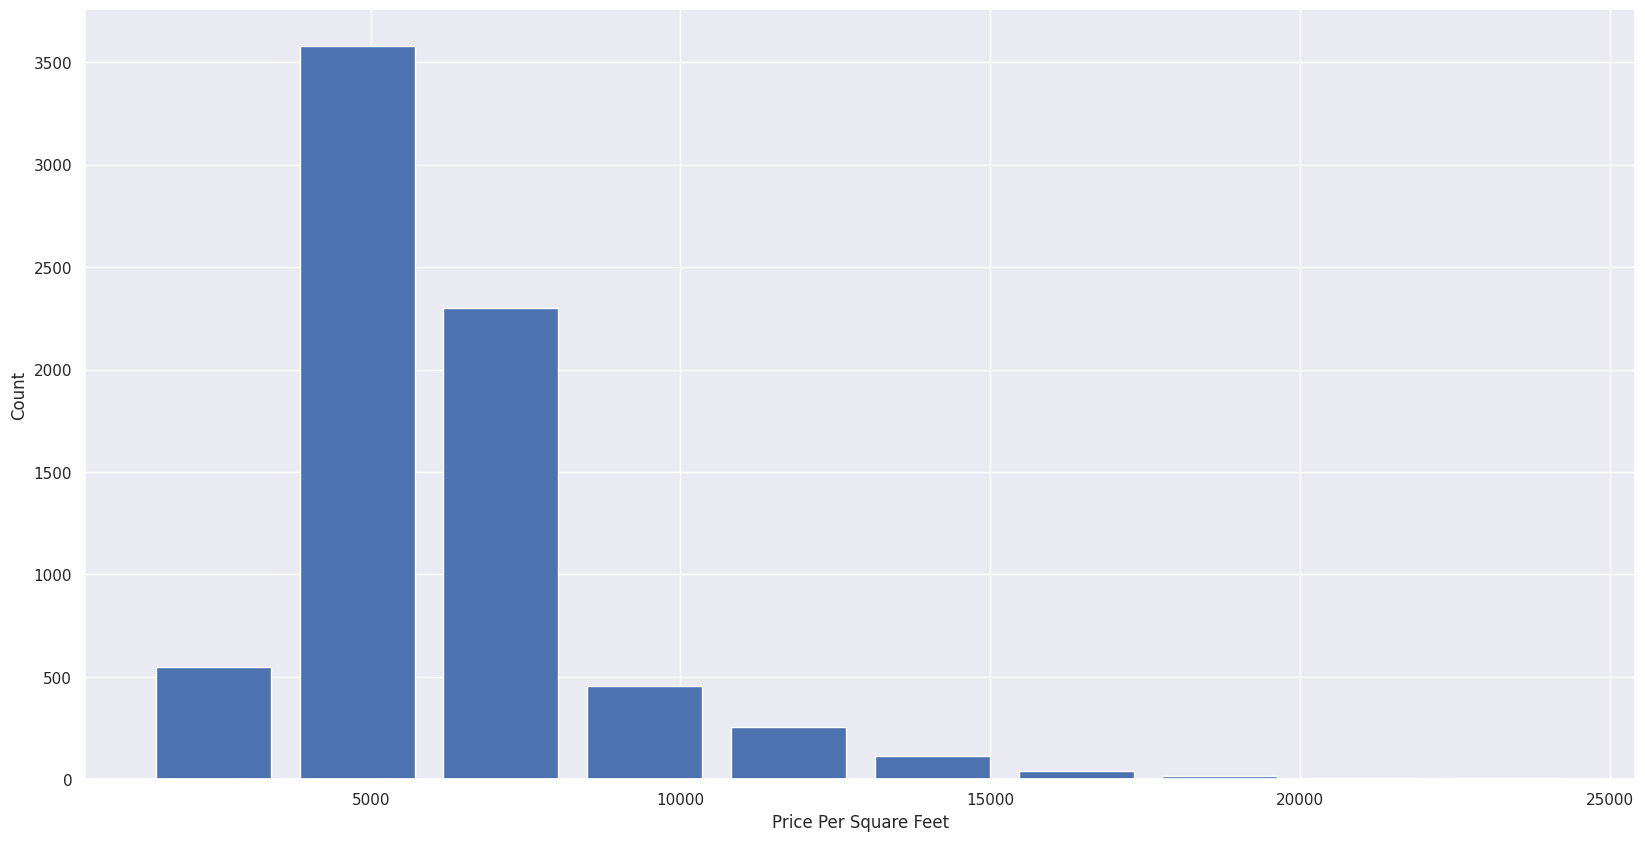

In [97]:
#plotting price per sqft
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# Outlier removing using bathroom feature

Text(0, 0.5, 'Count')

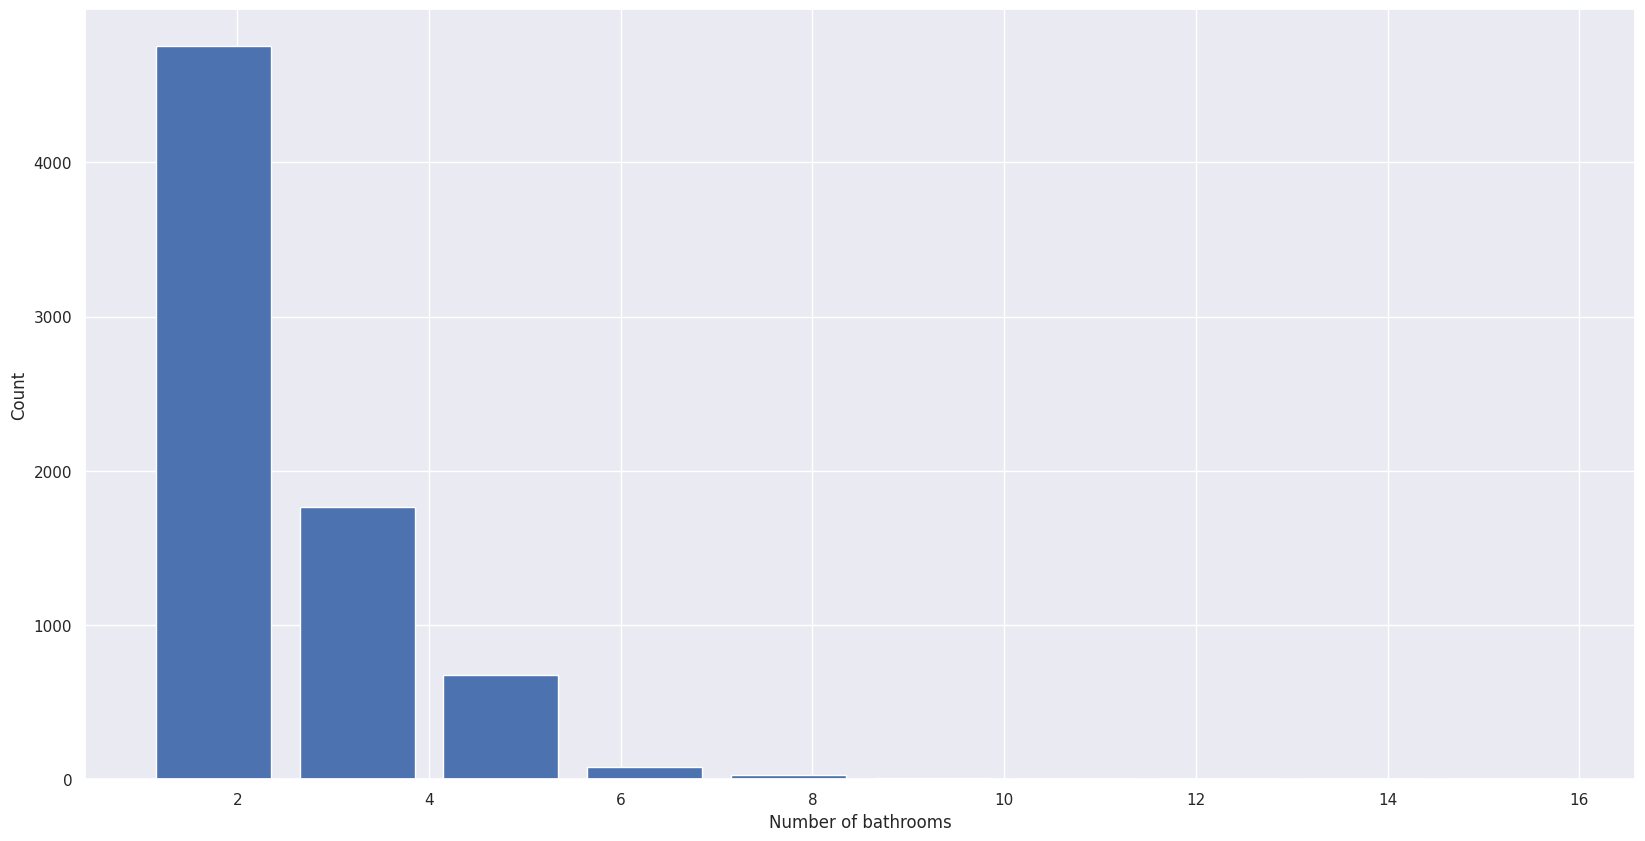

In [98]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [99]:
df7[df7.bath>df7.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5851,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9017,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [100]:
df8 = df7[df7.bath<df7.BHK+2]
df8.shape

(7239, 7)

In [101]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head(3)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


# One Hot Encoding for dummies

In [102]:
dummies = pd.get_dummies(df9.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [103]:
df10 = pd.concat([df9,dummies.drop(['Other'],axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [104]:
df11 = df10.drop('location', axis =1)
df11.shape

(7239, 244)

# Model bulding

In [105]:
X = df11.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [106]:
y = df11.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [108]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8697077447864618

**here our linear regression model is 86.97% accurate.**

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [109]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# shuffle Split used for shuffling train_data and test_data
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85828778, 0.84336113, 0.79796392, 0.83935442, 0.87210932])

In [110]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [111]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.97216916101904